In [ ]:
print("hello TalentoB")

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
## sklearn kmeans, pca y isolation forest
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
## sklearn metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.model_selection import train_test_split



In [3]:


with open('LZ_Datos_Dummy_TalentoB.txt', 'r') as file:
    lines = file.readlines()

columns = ['id', 'fecha', 'eventid', 'msgtimestamp', 'computer', 'accountname', 'lastusercharacter',
           'newlogonaccountname', 'newlastusercharacter', 'accountdomain', 'newlogonaccountdomain',
           'logontype', 'logonprocess', 'authenticationpackage', 'transitedservices', 'packagenamentlmonly',
           'keylength', 'callerprocessid', 'callerprocessname', 'failaccountname', 'failaccountdomain',
           'logonid', 'sourceport', 'status', 'workstationname', 'ciudad', 'day', 'month', 'year',
           'year_event', 'month_event', 'day_event', 'hour_event', 'minutes_event', 'seconds_event',
           'dayweekname', 'dayweeknumber', 'festivo', 'msgtimestamp_col']

data = {col: [] for col in columns}

# Procesar cada línea del archivo
for line in lines:
    items = line.split('#')
    for i, col in enumerate(columns):
        value = items[i].split()[-1].strip()
        # Verificar si el valor es igual al nombre de la columna y reemplazar por "-"
        data[col].append('' if value == col else value)

df = pd.DataFrame(data)

# Corregir el formato de la columna 'fecha'
df['fecha'] = pd.to_datetime(df['fecha'].str.replace('fecha ', ''), format='%Y%m%d', errors='coerce')

# Convertir columnas de fecha y hora a tipos de datos adecuados
df['msgtimestamp'] = pd.to_datetime(df['msgtimestamp'], errors='coerce')
df['msgtimestamp_col'] = pd.to_datetime(df['msgtimestamp_col'], errors='coerce')

# Guardar el DataFrame en un archivo Excel
df.to_excel('data.xlsx', index=False, header=True)







C:\Users\juanc\AppData\Local\Temp\ipykernel_20648\3759580999.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['msgtimestamp'] = pd.to_datetime(df['msgtimestamp'], errors='coerce')
C:\Users\juanc\AppData\Local\Temp\ipykernel_20648\3759580999.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['msgtimestamp_col'] = pd.to_datetime(df['msgtimestamp_col'], errors='coerce')


In [4]:
df = pd.read_excel('data.xlsx')

# Ver un resumen del DataFrame
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60322 entries, 0 to 60321
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     60322 non-null  object        
 1   fecha                  60322 non-null  datetime64[ns]
 2   eventid                60322 non-null  int64         
 3   msgtimestamp           60322 non-null  datetime64[ns]
 4   computer               60322 non-null  object        
 5   accountname            60322 non-null  object        
 6   lastusercharacter      0 non-null      float64       
 7   newlogonaccountname    60078 non-null  object        
 8   newlastusercharacter   0 non-null      float64       
 9   accountdomain          60322 non-null  object        
 10  newlogonaccountdomain  60078 non-null  object        
 11  logontype              60322 non-null  int64         
 12  logonprocess           60322 non-null  object        
 13  a

In [6]:
# Eliminar todas las filas duplicadas
df.drop_duplicates(inplace=True)
# Eliminar todas las columnas que tengan todos sus valores en NaN
df.dropna(axis=1, how='all', inplace=True)
# Eliminar todas las filas que tengan todos sus valores en NaN
df.dropna(axis=0, how='all', inplace=True)


In [12]:
## verificamos datos nuevamente y contamos cuantos datos diferentes hay en cada columna con nunique
print(df.info())
print(df.describe())
print(df.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60322 entries, 0 to 60321
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     60322 non-null  object        
 1   fecha                  60322 non-null  datetime64[ns]
 2   eventid                60322 non-null  int64         
 3   msgtimestamp           60322 non-null  datetime64[ns]
 4   computer               60322 non-null  object        
 5   accountname            60322 non-null  object        
 6   newlogonaccountname    60078 non-null  object        
 7   accountdomain          60322 non-null  object        
 8   newlogonaccountdomain  60078 non-null  object        
 9   logontype              60322 non-null  int64         
 10  logonprocess           60322 non-null  object        
 11  authenticationpackage  60322 non-null  object        
 12  transitedservices      60322 non-null  object        
 13  p

In [19]:
##eliminamos variables que no aportan informacion
df_clean = df.drop(['id', 'fecha',
              'transitedservices', 'logontype',
              'ciudad', 'month', 'year',
              'year_event', 'month_event',
              'dayweekname', 'dayweeknumber', 'festivo'], axis=1)

## verificamos datos nuevamente y contamos cuantos datos diferentes hay en cada columna con nunique
print(df_clean.info())
print(df_clean.describe())
print(df_clean.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60322 entries, 0 to 60321
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   eventid                60322 non-null  int64         
 1   msgtimestamp           60322 non-null  datetime64[ns]
 2   computer               60322 non-null  int32         
 3   accountname            60322 non-null  object        
 4   newlogonaccountname    60078 non-null  object        
 5   accountdomain          60322 non-null  object        
 6   newlogonaccountdomain  60078 non-null  object        
 7   logonprocess           60322 non-null  object        
 8   authenticationpackage  60322 non-null  object        
 9   packagenamentlmonly    60322 non-null  object        
 10  keylength              60322 non-null  int64         
 11  callerprocessid        244 non-null    object        
 12  callerprocessname      244 non-null    object        
 13  f

In [33]:

column_names = ["eventid", "msgtimestamp","computer","accountname","newlogonaccountname","accountdomain","newlogonaccountdomain","logonprocess","authenticationpackage","packagenamentlmonly",
    "keylength","callerprocessid","callerprocessname","failaccountname","failaccountdomain","logonid","sourceport","status","workstationname","day","day_event","hour_event",
    "minutes_event","seconds_event","msgtimestamp_col"]
## tratamos los datos faltantes con imputacion multivariable
## para ello primero debemos convertir las variables categoricas a numericas
## para ello usamos label encoder que asigna un numero a cada categoria
le = preprocessing.LabelEncoder()
df_clean = df_clean.apply(le.fit_transform)
print(df_clean.info())
print(df_clean.describe())
print(df_clean.nunique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60322 entries, 0 to 60321
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   eventid                60322 non-null  int64
 1   msgtimestamp           60322 non-null  int64
 2   computer               60322 non-null  int64
 3   accountname            60322 non-null  int64
 4   newlogonaccountname    60322 non-null  int64
 5   accountdomain          60322 non-null  int64
 6   newlogonaccountdomain  60322 non-null  int64
 7   logonprocess           60322 non-null  int64
 8   authenticationpackage  60322 non-null  int64
 9   packagenamentlmonly    60322 non-null  int64
 10  keylength              60322 non-null  int64
 11  callerprocessid        60322 non-null  int64
 12  callerprocessname      60322 non-null  int64
 13  failaccountname        60322 non-null  int64
 14  failaccountdomain      60322 non-null  int64
 15  logonid                60322 non-nul

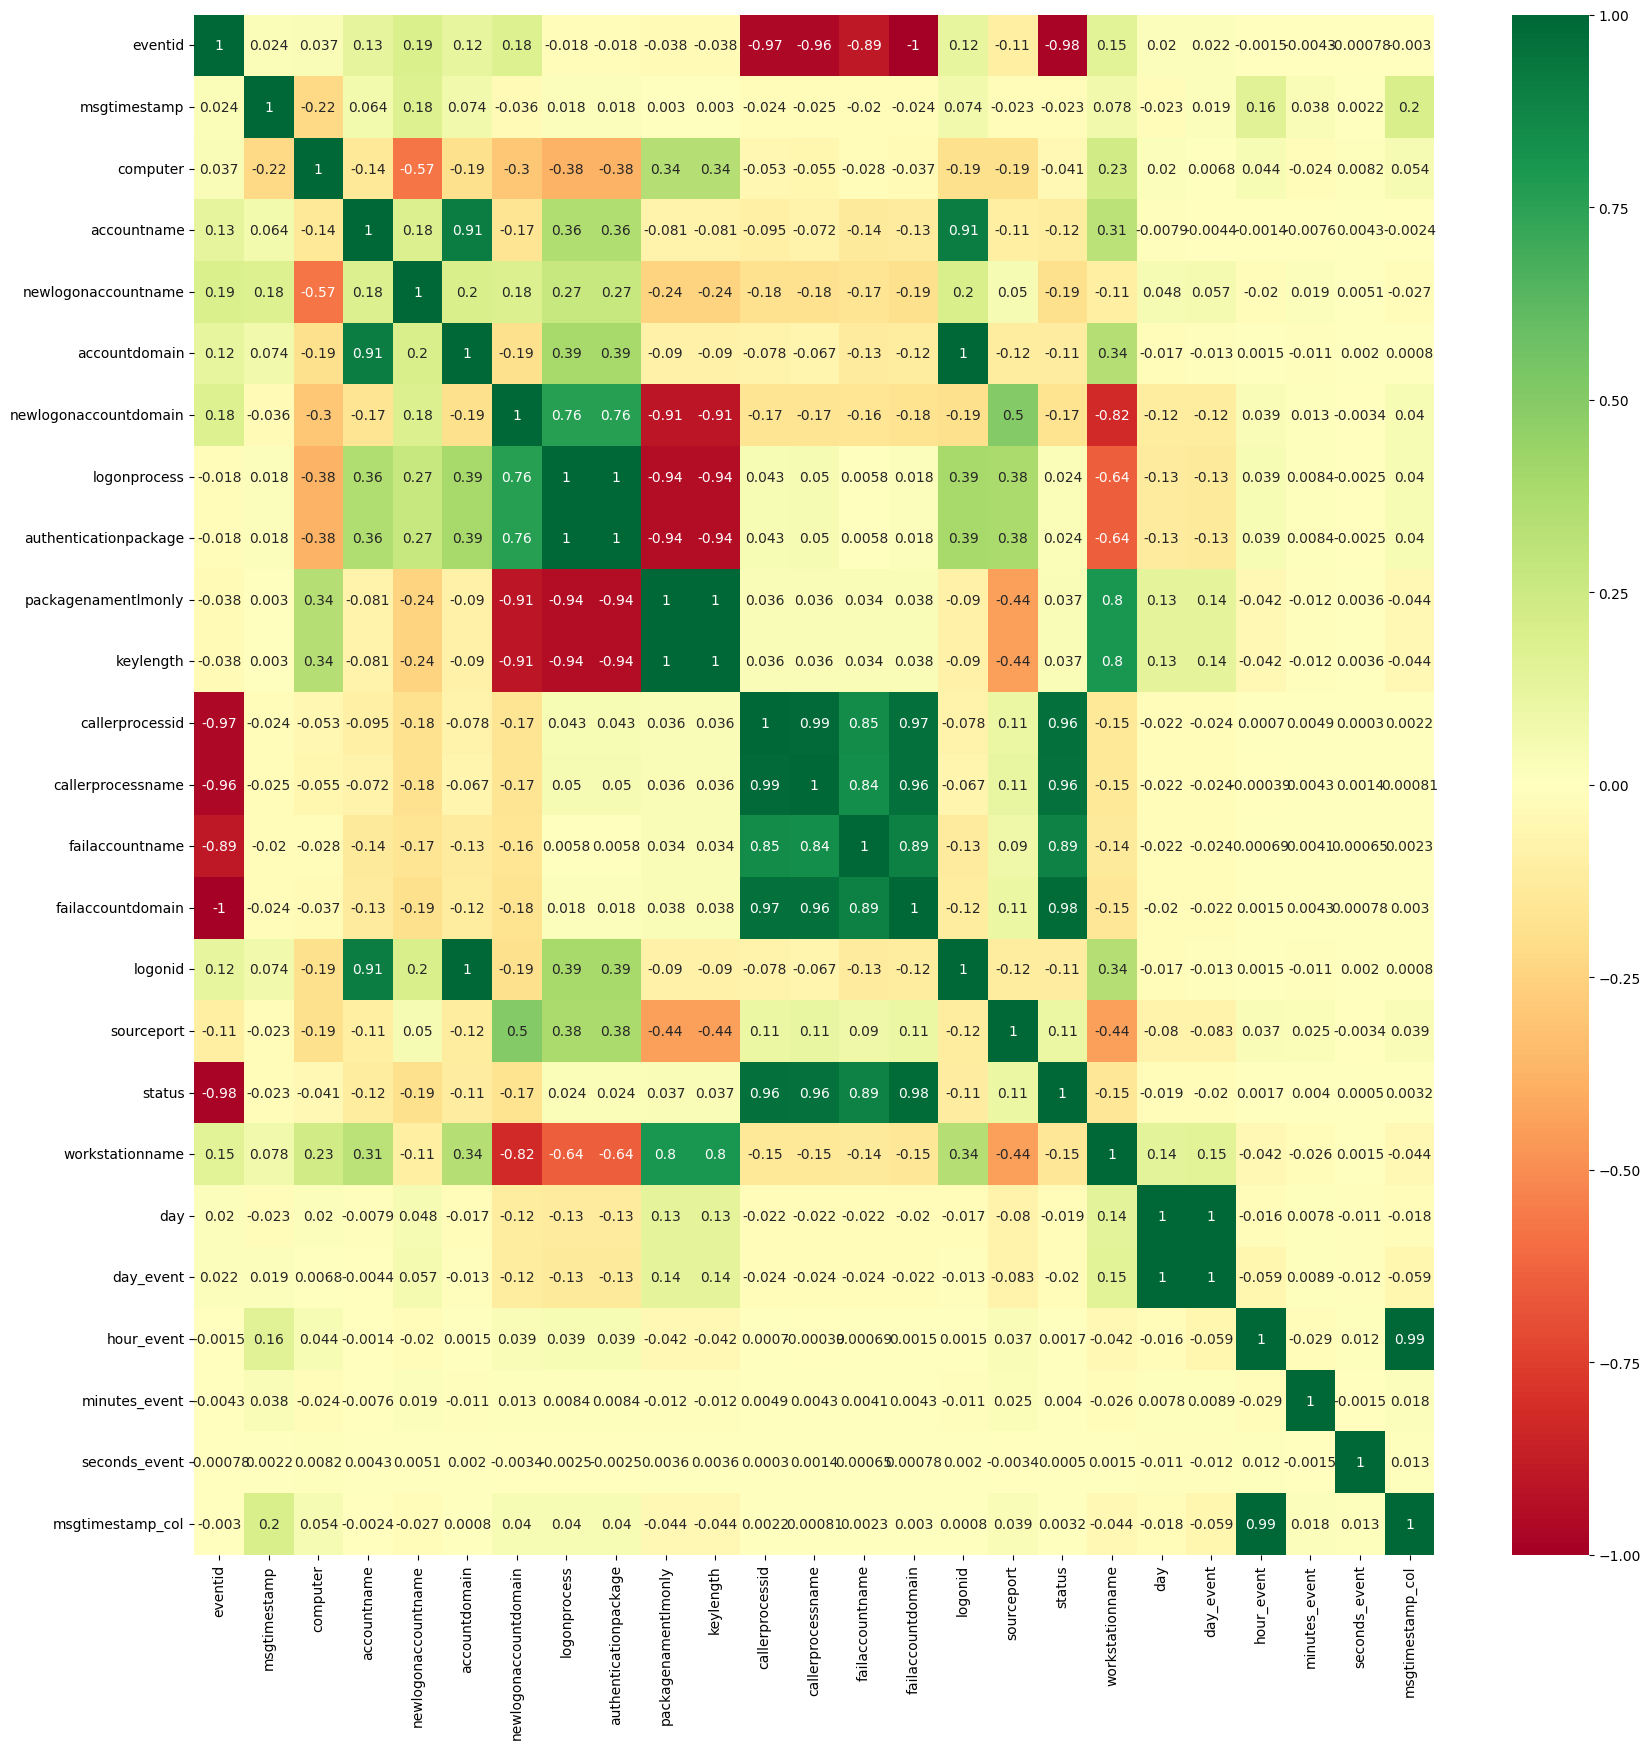

In [23]:
## heatmap para ver la correlacion entre las variables
plt.figure(figsize=(20,20))
sns.heatmap(df_clean.corr(), annot=True, cmap="RdYlGn")
plt.show()


In [46]:
## eliminamos las variables que tienen una correlacion mayor a 0.9
df_clean_reduced = df_clean.drop(['eventid', 'workstationname', 'msgtimestamp_col', 'keylength', 'status', 'logonid', 'accountname', 'authenticationpackage', 'newlogonaccountdomain', 'logonprocess','failaccountname','callerprocessname','callerprocessid'], axis=1)


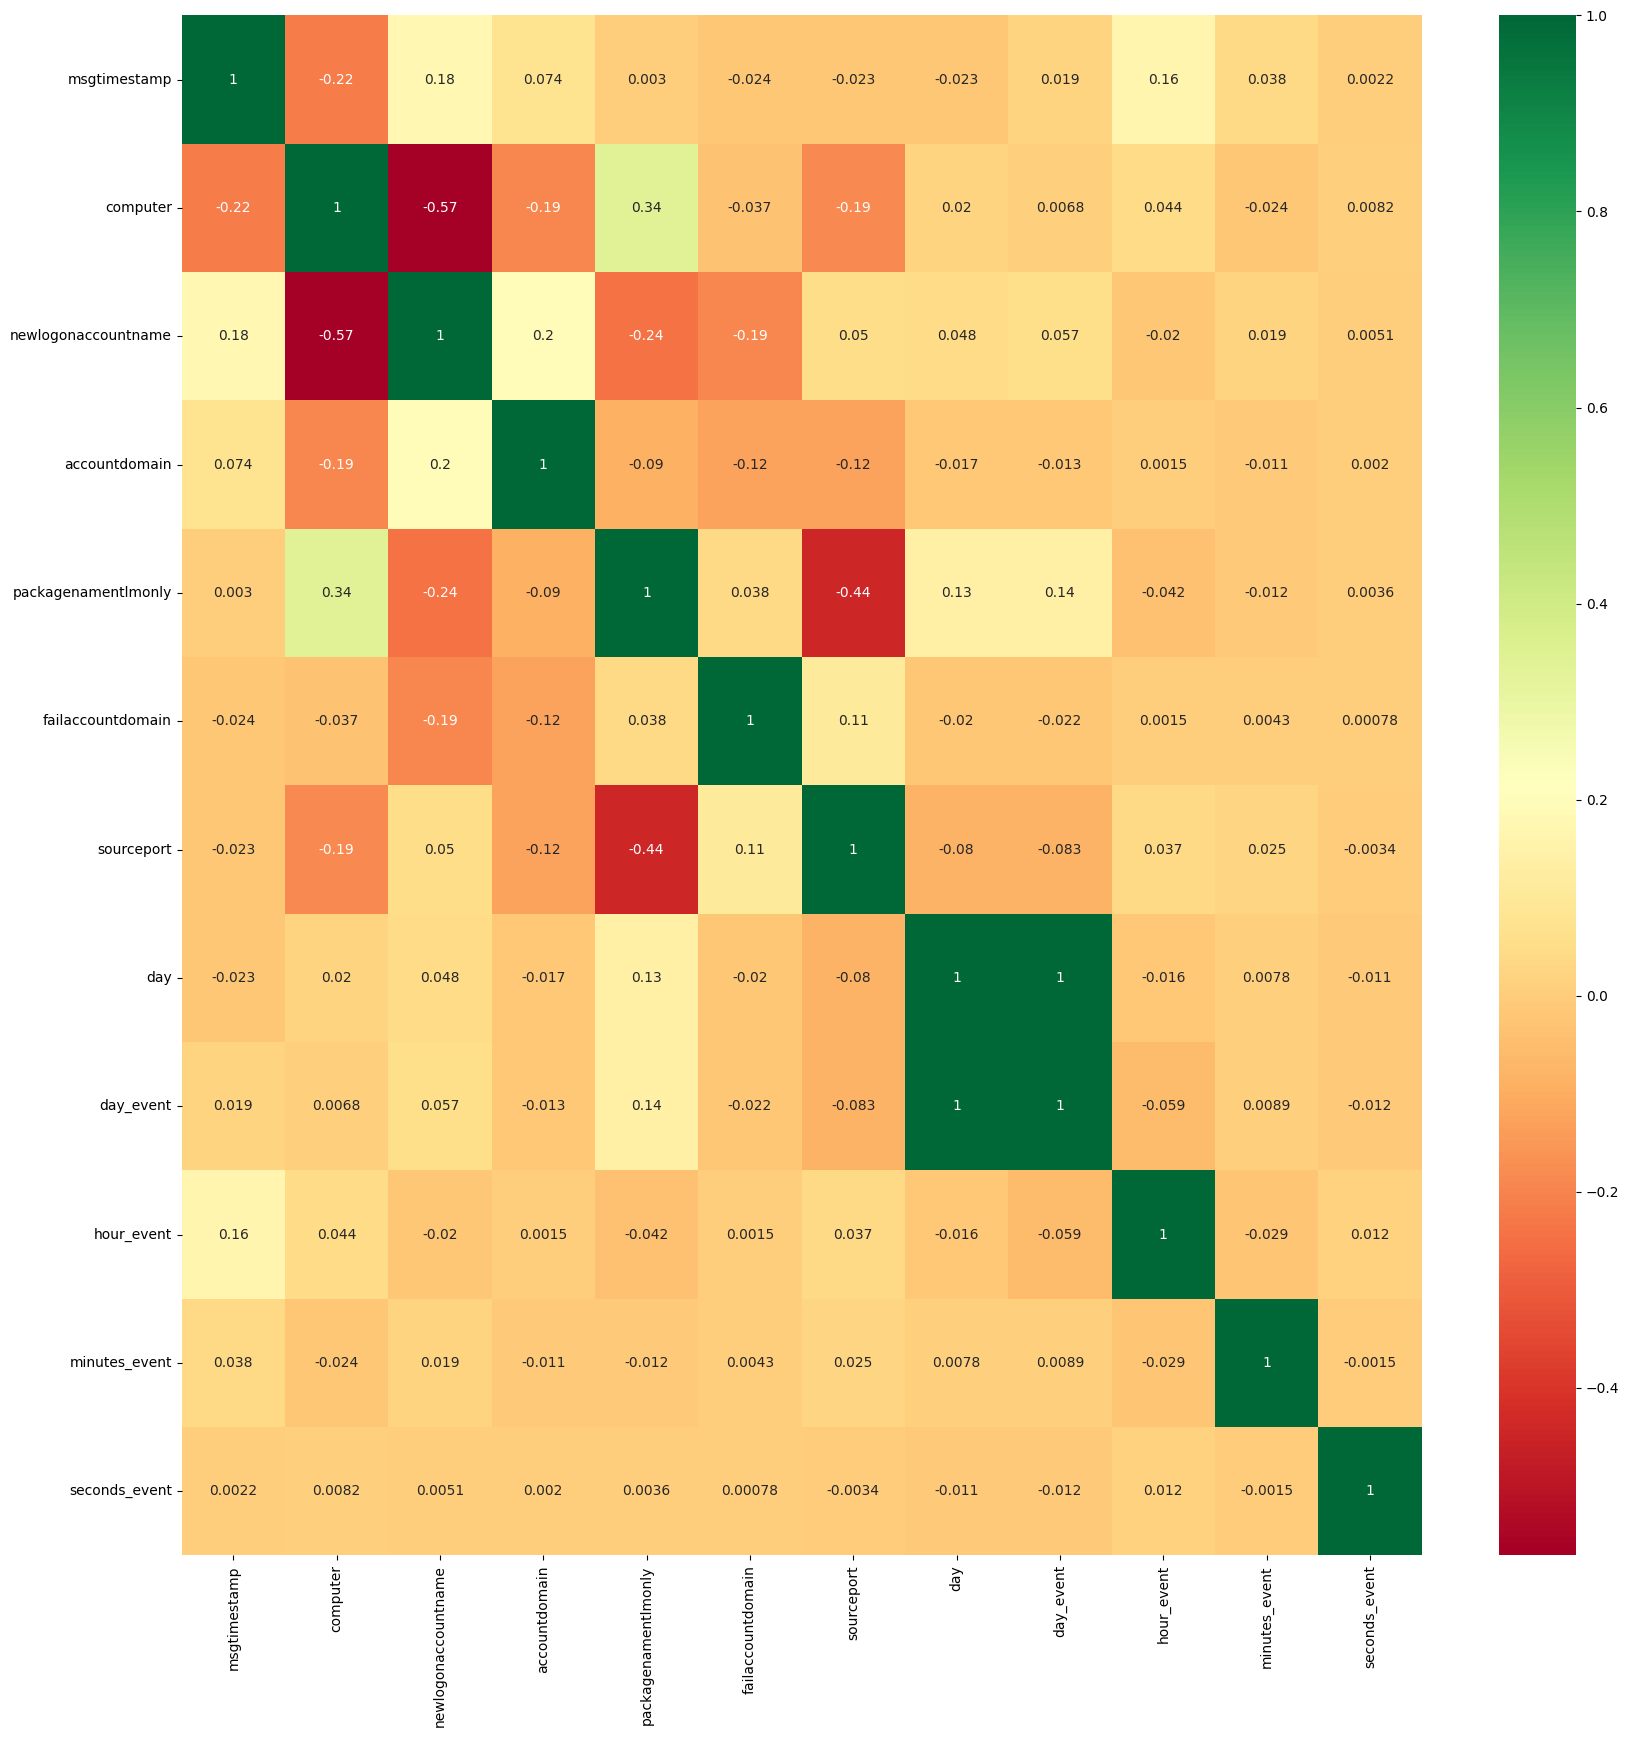

In [47]:
## heatmap para ver la correlacion entre las variables
plt.figure(figsize=(20,20))
sns.heatmap(df_clean_reduced.corr(), annot=True, cmap="RdYlGn")
plt.show()

c:\Users\juanc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juanc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juanc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juanc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

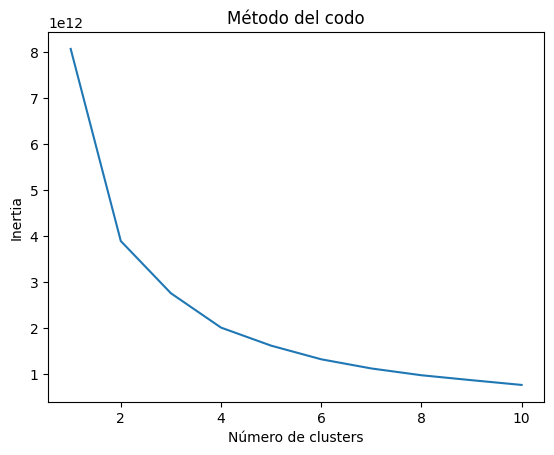

In [60]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_clean_reduced)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show()


In [61]:
#una vez tenemos el numero de clusters, realizamos el kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_clean_reduced)
df_clean_reduced['cluster'] = kmeans.labels_
print(df_clean_reduced['cluster'].value_counts())

cluster
0    32913
1    27409
Name: count, dtype: int64


c:\Users\juanc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


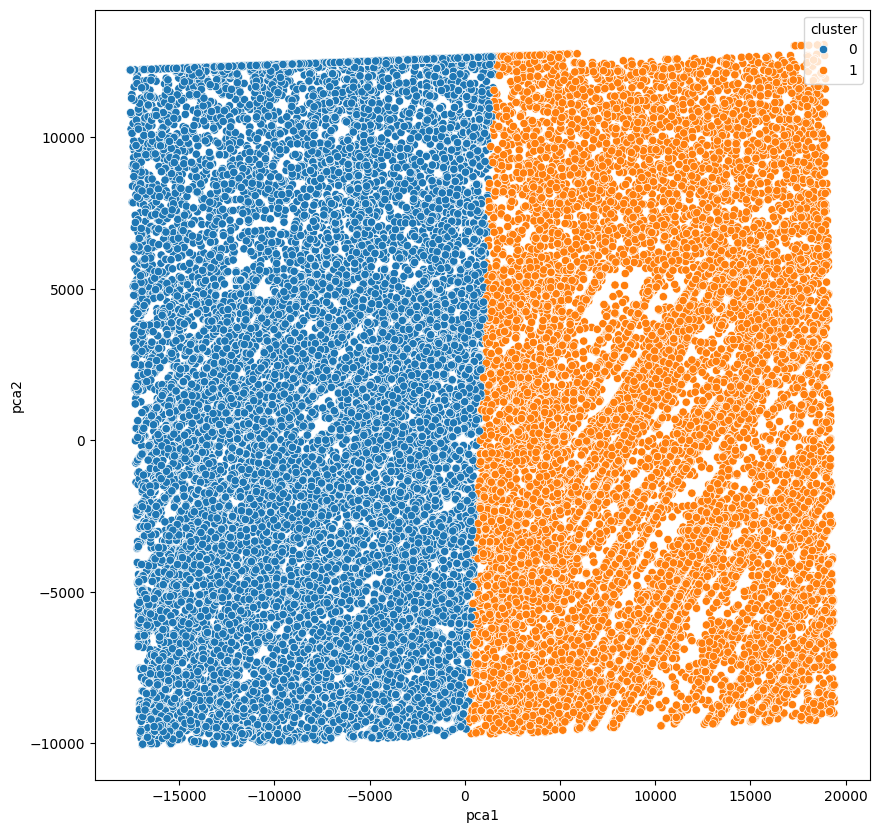

In [64]:
## ahora dibujamos los clusters en 2 dimensiones
pca = PCA(n_components=2)
df_clean_reduced_pca = pca.fit_transform(df_clean_reduced)
df_clean_reduced_pca = pd.DataFrame(df_clean_reduced_pca)
df_clean_reduced_pca.columns = ['pca1', 'pca2']
df_clean_reduced_pca['cluster'] = df_clean_reduced['cluster']
df_clean_reduced_pca.head()

## graficamos los clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=df_clean_reduced_pca)
plt.show()



In [68]:
## hacemos una copia del df original y le aggregamos la columna de cluster
df_cluster = df_clean.copy()
df_cluster['cluster'] = df_clean_reduced['cluster']
df_cluster.head()
# y lo agregamos al df original en una columna nueva
df_original = df.copy()
df_original['cluster'] = df_cluster['cluster']
df_original.head()




,id,fecha,eventid,msgtimestamp,computer,accountname,newlogonaccountname,accountdomain,newlogonaccountdomain,logontype,...,month_event,day_event,hour_event,minutes_event,seconds_event,dayweekname,dayweeknumber,festivo,msgtimestamp_col,cluster
0,aa38b6e3-19d4-40a0-b423-25885cb6f2b3,2023-10-13,4624,2023-11-16 06:01:02,10,-,user12,-,crock.corp,3,...,10,13,1,1,2,Friday,5,0,2023-11-16 01:01:02,1
1,aa57cbdc-af1f-4152-939c-6457ac9f8aa7,2023-10-18,4624,2023-11-16 12:06:11,10,-,user20,-,crock,3,...,10,18,7,6,11,Wednesday,3,0,2023-11-16 07:06:11,1
2,aa671de1-5e69-47f8-9e2d-78bb110fba2d,2023-10-17,4624,2023-11-16 20:35:10,4,-,user2,-,crock.corp,3,...,10,17,15,35,10,Tuesday,2,0,2023-11-16 15:35:10,0
3,aa793141-e0d5-4a66-963f-7f202a6a4229,2023-10-12,4624,2023-11-16 06:20:18,10,-,user12,-,crock.corp,3,...,10,12,1,20,18,Thursday,4,0,2023-11-16 01:20:18,1
4,aaaaa12a-6899-4ea8-8d1b-2c6ff6ee305d,2023-10-10,4624,2023-11-16 12:27:59,4,-,user1,-,crock.corp,3,...,10,10,7,27,59,Tuesday,2,0,2023-11-16 07:27:59,1


In [69]:
##ahora lo guardamos en un archivo excel
df_original.to_excel('data_cluster.xlsx', index=False, header=True)

c:\Users\juanc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juanc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juanc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juanc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

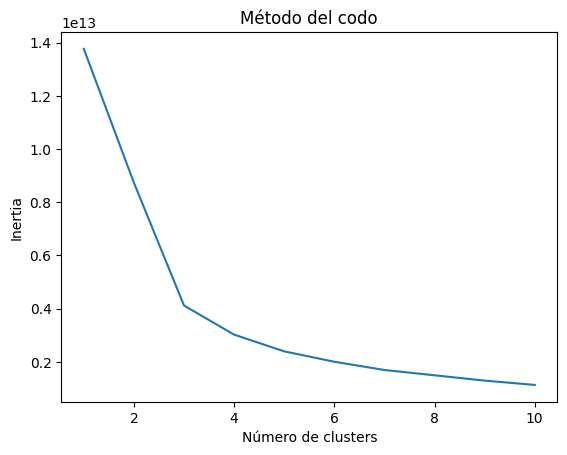

In [75]:
# entrenemos sin la deata reduced
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_clean)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show()




In [78]:
#una vez tenemos el numero de clusters, realizamos el kmeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_clean)
df_clean['cluster'] = kmeans.labels_
print(df_clean['cluster'].value_counts())

cluster
0    27191
1    25161
2     7970
Name: count, dtype: int64


c:\Users\juanc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


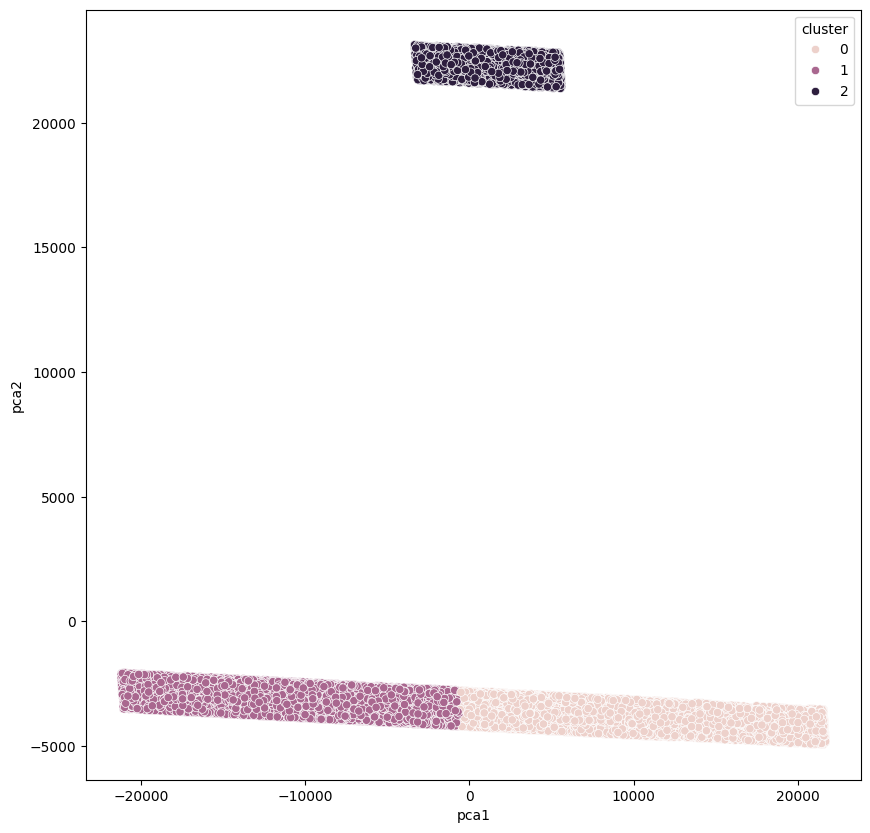

In [81]:
## ahora dibujamos los clusters en 2 dimensiones
pca = PCA(n_components=3)
df_clean_pca = pca.fit_transform(df_clean)
df_clean_pca = pd.DataFrame(df_clean_pca)
df_clean_pca.columns = ['pca1', 'pca2', 'pca3']
df_clean_pca['cluster'] = df_clean['cluster']
df_clean_pca.head()

## graficamos los clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=df_clean_pca)
plt.show()


In [82]:
## hacemos una copia del df original y le aggregamos la columna de cluster
df_cluster = df_clean.copy()
df_cluster['cluster'] = df_clean['cluster']
df_cluster.head()
# y lo agregamos al df original en una columna nueva
df_original = df.copy()
df_original['cluster'] = df_cluster['cluster']
df_original.head()
##ahora lo guardamos en un archivo excel
df_original.to_excel('data_cluster2.xlsx', index=False, header=True)

In [106]:
## convertimos las variables categoricas a numericas unicamentes para el isolation forest
le = preprocessing.LabelEncoder()
df_clean_if = df_clean.apply(le.fit_transform)

In [113]:
## ahora hacemos el isolation forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(df_clean_if)

## contador de outliers
outliers_counter = isolation_forest.predict(df_clean_if)
print(pd.Series(outliers_counter).value_counts())


 1    59719
-1      603
Name: count, dtype: int64


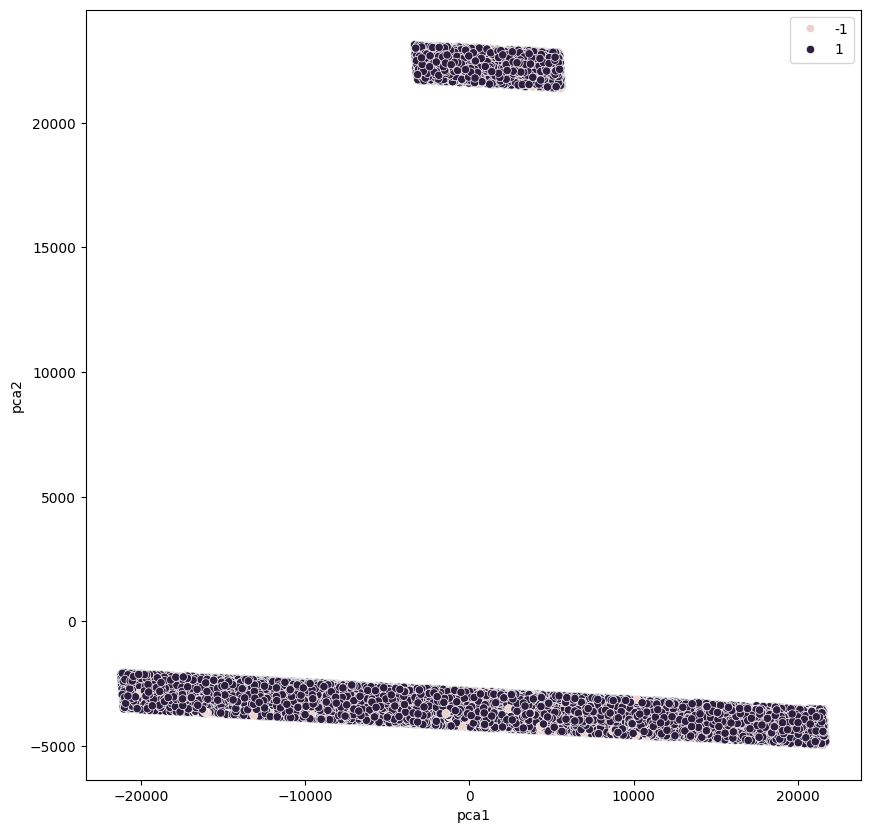

In [114]:
# graficamos los outliers
plt.figure(figsize=(10, 10))
sns.scatterplot(x="pca1", y="pca2", hue=outliers_counter, data=df_clean_pca)
plt.show()

In [115]:
# vemos los outliers
df_clean_if['outlier'] = outliers_counter
df_clean_if.head()
df_clean_if[df_clean_if['outlier'] == -1].head()


,eventid,msgtimestamp,computer,accountname,newlogonaccountname,accountdomain,newlogonaccountdomain,logonprocess,authenticationpackage,packagenamentlmonly,...,status,workstationname,day,day_event,hour_event,minutes_event,seconds_event,msgtimestamp_col,cluster,outlier
48,1,15801,13,0,21,0,2,0,0,0,...,0,34,15,16,7,59,32,9541,0,-1
166,1,18295,6,4,21,1,2,2,2,0,...,1,33,9,10,9,22,40,12035,0,-1
248,0,23600,5,3,2,1,0,2,2,0,...,3,32,10,11,11,48,22,17340,1,-1
296,0,20633,2,1,16,1,0,2,2,0,...,3,30,11,12,10,12,25,14373,0,-1
465,1,23216,3,2,21,1,2,2,2,0,...,1,31,8,9,11,35,24,16956,1,-1


In [116]:
## hacemos una copia del df original y le aggregamos la columna de cluster
df_cluster = df_clean_if.copy()
df_cluster['outlier'] = outliers_counter
df_cluster.head()
# y lo agregamos al df original en una columna nueva
df_original = df.copy()
df_original['outlier'] = df_cluster['outlier']
df_original.head()
##ahora lo guardamos en un archivo excel
df_original.to_excel('data_outliers_iforest.xlsx', index=False, header=True)


In [120]:
X_train, X_test = train_test_split(df_clean_if, test_size=0.3, random_state=42)

contamination_values = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1]
n_trees_values = [50, 100, 150, 200]

# Almacena la puntuación de decisión para cada combinación de contaminación y número de árboles
decision_scores = []

# Bucle para variar la contaminación
for contamination_value in contamination_values:
    # Bucle para variar el número de árboles
    for n_trees_value in n_trees_values:
        isolation_forest = IsolationForest(n_estimators=n_trees_value, contamination=contamination_value)
        isolation_forest.fit(X_train)
        
        # Obtiene la puntuación de decisión para el conjunto de prueba
        decision_score = isolation_forest.decision_function(X_test)
        decision_scores.append(np.min(decision_score))  # Utiliza np.min para obtener el mínimo

# Encuentra los mejores valores de contaminación y número de árboles
best_index = np.argmin(decision_scores)
best_contamination = contamination_values[best_index // len(n_trees_values)]
best_n_trees = n_trees_values[best_index % len(n_trees_values)]

print(f"El mejor valor de contaminación es: {best_contamination}")
print(f"El mejor número de árboles es: {best_n_trees}")

El mejor valor de contaminación es: 0.1
El mejor número de árboles es: 50


In [124]:
## entrenamos el modelo con los mejores valores
isolation_forest = IsolationForest(n_estimators=best_n_trees, contamination=best_contamination)
isolation_forest.fit(X_train)

## contador de outliers
outliers_counter = isolation_forest.predict(df_clean_if)
print(pd.Series(outliers_counter).value_counts())

 1    54273
-1     6049
Name: count, dtype: int64


In [ ]:
## hacemos una copia del df original y le aggregamos la columna de cluster
df_cluster = df_clean_if.copy()
df_cluster['outlier'] = outliers_counter

# y lo agregamos al df original en una columna nueva
df_original = df.copy()
df_original['outlier'] = df_cluster['outlier']
df_original.head()
##ahora lo guardamos en un archivo excel
df_original.to_excel('data_outliers_iforest2.xlsx', index=False, header=True)